#KNN Regressor

In [2]:
import pandas as pd
from sklearn import cross_validation

In [10]:
df = pd.read_csv("/Users/Ikkei/data-analysis/DAT18NYC/data/credit-data-post-import.csv")

In [11]:
train, test = cross_validation.train_test_split(df)

# Asign header
train = pd.DataFrame(train, columns=df.columns)
test = pd.DataFrame(test, columns=df.columns)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
income_imputer = KNeighborsRegressor(n_neighbors=1)

train_w_monthly_income = train[train.monthly_income.isnull()==False]
train_wo_monthly_income = train[train.monthly_income.isnull()==True]

In [17]:
corr = train_w_monthly_income.corr()
corr.ix[:, 5].order(ascending=False)

monthly_income                                 1.000000
number_real_estate_loans_or_lines              0.200834
number_of_open_credit_lines_and_loans          0.144115
number_of_dependents                           0.096186
age                                            0.060952
revolving_utilization_of_unsecured_lines       0.006168
number_of_time30-59_days_past_due_not_worse   -0.015662
number_of_time60-89_days_past_due_not_worse   -0.017414
number_of_times90_days_late                   -0.019770
serious_dlqin2yrs                             -0.030358
debt_ratio                                    -0.044780
Name: monthly_income, dtype: float64

### Try to impute monthly_inome to see how well KNN did

In [29]:
cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']

# p = 1, Manhattan
# p = 2, Eucredian

# n_neighbors=1
inc_imputer = KNeighborsRegressor(n_neighbors=1, p=2)
inc_imputer.fit(X=train_w_monthly_income[cols], y=train_w_monthly_income.monthly_income)

# Fills NA for monthly_income
train_wo_monthly_income.monthly_income = inc_imputer.predict(train_wo_monthly_income[cols])

test['monthly_income_imputed'] = inc_imputer.predict(test[cols])
test[['monthly_income', 'monthly_income_imputed']].head()

,monthly_income,monthly_income_imputed
0,16000,2700
1,8733,2000
2,4583,3850
3,9800,5000
4,NaN,4700


In [30]:
# n_neighbors=2
inc_imputer = KNeighborsRegressor(n_neighbors=2, p=2)
inc_imputer.fit(X=train_w_monthly_income[cols], y=train_w_monthly_income.monthly_income)

# Fills NA for monthly_income
train_wo_monthly_income.monthly_income = inc_imputer.predict(train_wo_monthly_income[cols])

test['monthly_income_imputed'] = inc_imputer.predict(test[cols])
test[['monthly_income', 'monthly_income_imputed']].head()

,monthly_income,monthly_income_imputed
0,16000,2850
1,8733,3037
2,4583,4425
3,9800,3570
4,NaN,4850


# Minkowski vs Jaccard

In [34]:
from sklearn import grid_search

imputer = KNeighborsRegressor()

param1 = {'p': (1,2), 'n_neighbors': range(1, 23, 3)}

regr = grid_search.GridSearchCV(imputer, param1, scoring='mean_squared_error')
regr.fit(X=train_w_monthly_income[cols], y=train_w_monthly_income.monthly_income)

GridSearchCV(cv=None,
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'p': (1, 2), 'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [37]:
param2 = {'metric': ['jaccard'], 'n_neighbors': range(1, 23, 3)}

jac = grid_search.GridSearchCV(imputer, param2, scoring='mean_squared_error')
jac.fit(X=train_w_monthly_income[cols], y=train_w_monthly_income.monthly_income)

GridSearchCV(cv=None,
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22], 'metric': ['jaccard']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [50]:
# print "----------Minkowski Grid Search-------------"
# for score in regr.grid_scores_:
#     print score

# print 
# print regr.best_estimator_
# print 

print "----------Jaccard Grid Search-------------"
for score in jac.grid_scores_:
    print score

print jac.best_estimator_ 

----------Jaccard Grid Search-------------
mean: -92054616.06163, std: 13025525.30069, params: {'n_neighbors': 1, 'metric': 'jaccard'}
mean: -79596768.06444, std: 19979422.67936, params: {'n_neighbors': 4, 'metric': 'jaccard'}
mean: -81738306.54254, std: 18636109.40144, params: {'n_neighbors': 7, 'metric': 'jaccard'}
mean: -82285285.70763, std: 18914678.30193, params: {'n_neighbors': 10, 'metric': 'jaccard'}
mean: -83952403.57473, std: 21954103.82048, params: {'n_neighbors': 13, 'metric': 'jaccard'}
mean: -82675296.99669, std: 20948832.85744, params: {'n_neighbors': 16, 'metric': 'jaccard'}
mean: -82406669.39759, std: 21669899.54081, params: {'n_neighbors': 19, 'metric': 'jaccard'}
mean: -82188735.58052, std: 21228618.20169, params: {'n_neighbors': 22, 'metric': 'jaccard'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='jaccard',
          metric_params=None, n_neighbors=4, p=2, weights='uniform')


#KNN Classifier

In [43]:
from sklearn import grid_search, datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
param = {'p': [2], 'n_neighbors': range(1, 100)}
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, param, scoring='accuracy')
clf.fit(iris.data, iris.target)

GridSearchCV(cv=None,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'p': [2], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

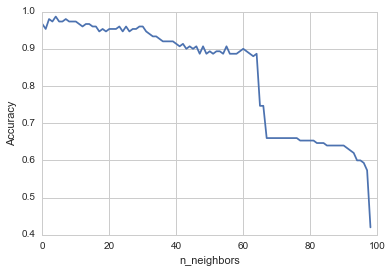

In [52]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

scores = [i.mean_validation_score for i in clf.grid_scores_]

sns.set_style('whitegrid')
plt.plot(scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

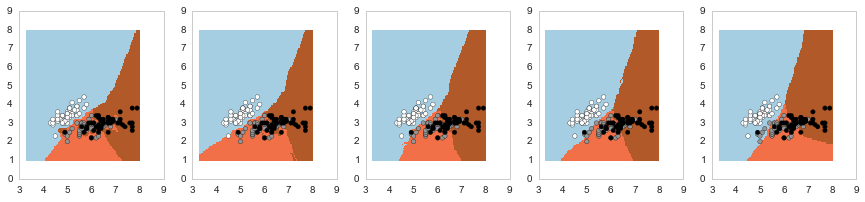

In [77]:
import numpy as np

def plot_estimator(estimator, X, y, ax, pos):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 0.1
    xx, yy= np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, x_max, 100))

    # classification
    z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # plot
    Z = z.reshape(xx.shape)
    ax[pos].pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    # Lets plot our sample points
    ax[pos].scatter(X[:,0], X[:,1], c=y)

fig, axes = plt.subplots(1, 5, figsize=[15, 3])
for e, k in enumerate([1, 5, 40, 60, 100]):
    plot_estimator(KNeighborsClassifier(n_neighbors=k), iris.data[:,:2], iris.target, axes, e)

#K Means